In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Advertising Budget and Sales.csv',index_col=0)

In [2]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape


(200, 4)

In [4]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [5]:
df.corr()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


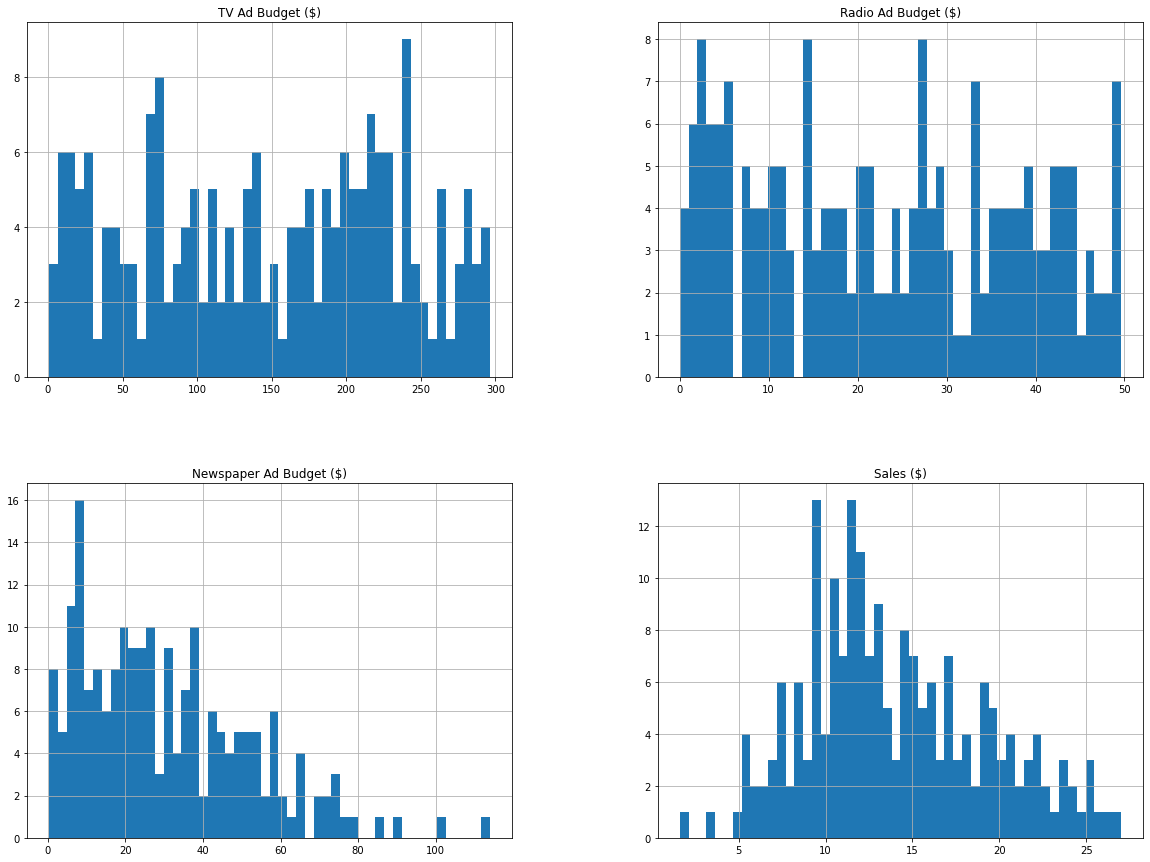

In [6]:
# To plot a histogram to understand the data
df.hist(bins=50, figsize=(20,15))
plt.show()

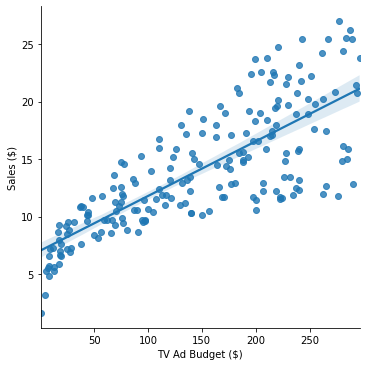

In [7]:
sns.lmplot(x="TV Ad Budget ($)", y="Sales ($)", data=df)

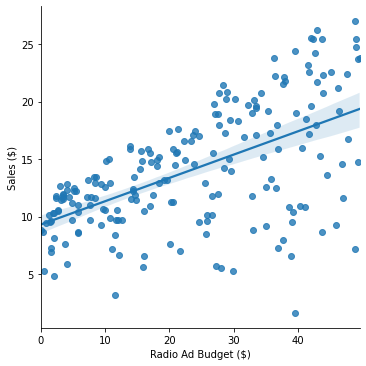

In [8]:
sns.lmplot(x="Radio Ad Budget ($)", y="Sales ($)", data=df)

In [9]:
# Check for any null values
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [10]:
df.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

In [11]:
# Finding the correlation
corr_matrix = df.corr()
corr_matrix["Sales ($)"].sort_values(ascending=False)

Sales ($)                  1.000000
TV Ad Budget ($)           0.782224
Radio Ad Budget ($)        0.576223
Newspaper Ad Budget ($)    0.228299
Name: Sales ($), dtype: float64

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


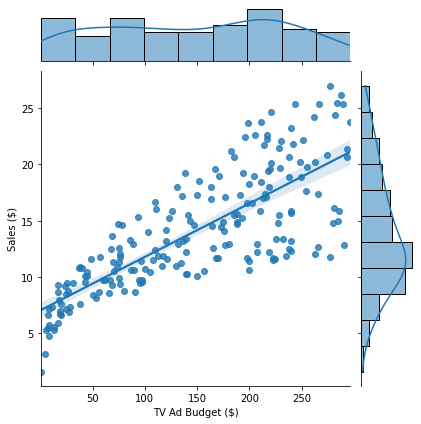

In [12]:
sns.jointplot(df['TV Ad Budget ($)'], df['Sales ($)'], kind = 'reg')

In [13]:
# Extract input (X) and output (Y) data from the dataset.
X = df[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]

y = df['Sales ($)']
X.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales ($), dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
# need to 'random' split data in train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 100)

# 80% in train
# 20% data in test

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)   # training

LinearRegression()

In [20]:
print("Intercept is "+ str(lm.intercept_))
print("coefficients  is "+str(lm.coef_))

Intercept is 2.8172751352950023
coefficients  is [0.0455864  0.18569816 0.00223281]


In [21]:
prediction = lm.predict(X_test)

In [22]:
prediction

array([10.50948755, 20.05723558, 16.82665516, 19.09405782, 20.94383845,
       13.25348896, 11.87554518, 12.4882643 , 20.51420388, 20.91328754,
       10.90182094, 19.44307823,  6.5040246 , 15.3178433 ,  9.04147699,
        8.03952046, 16.26581002, 12.10312044, 17.12086602, 11.28131376,
       17.07036157,  9.84452136, 20.70077487, 17.17479561, 15.19498306,
       21.96631309, 19.1587532 , 10.09216975, 19.40214482, 14.88180369,
       14.27844074,  7.69173892, 10.00183154, 14.82404891,  7.29177732,
       13.63453936,  7.59380446, 11.84106127, 13.61631336, 15.18810875])

In [23]:
#actual value
print(y_test)

127     6.6
105    20.7
100    17.2
93     19.4
112    21.8
168    12.2
117    12.2
97     11.7
53     22.6
70     22.3
165    11.9
125    19.7
183     8.7
155    15.6
126    10.6
197     9.7
195    17.3
178    11.7
164    18.0
32     11.9
12     17.4
74     11.0
16     22.4
42     17.1
98     15.5
129    24.7
134    19.6
83     11.3
140    20.7
124    15.2
84     13.6
66      9.3
152    11.6
163    14.9
171     8.4
78     14.2
33      9.6
174    11.7
175    11.5
86     15.2
Name: Sales ($), dtype: float64


In [24]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# error metrics for test data
MSE_test = mean_squared_error(y_test, prediction)
RMSE_test = sqrt(MSE_test)

MAE_test = mean_absolute_error(y_test, prediction)
MAPE_test = mean_absolute_percentage_error(y_test, prediction)

print('Mean square error for test data is :', MSE_test)
print('Root Mean square error for test data is :', RMSE_test)
print('Mean Absolute error for test data is :', MAE_test)
print('Mean Absolute percentage error for test data is :', MAPE_test)

Mean square error for test data is : 1.7332927815807733
Root Mean square error for test data is : 1.316545776485107
Mean Absolute error for test data is : 1.027167990492494
Mean Absolute percentage error for test data is : 0.0851633685396856


In [25]:
test = pd.DataFrame({'Predicted':prediction,'Actual':y_test})
print(test)

     Predicted  Actual
127  10.509488     6.6
105  20.057236    20.7
100  16.826655    17.2
93   19.094058    19.4
112  20.943838    21.8
168  13.253489    12.2
117  11.875545    12.2
97   12.488264    11.7
53   20.514204    22.6
70   20.913288    22.3
165  10.901821    11.9
125  19.443078    19.7
183   6.504025     8.7
155  15.317843    15.6
126   9.041477    10.6
197   8.039520     9.7
195  16.265810    17.3
178  12.103120    11.7
164  17.120866    18.0
32   11.281314    11.9
12   17.070362    17.4
74    9.844521    11.0
16   20.700775    22.4
42   17.174796    17.1
98   15.194983    15.5
129  21.966313    24.7
134  19.158753    19.6
83   10.092170    11.3
140  19.402145    20.7
124  14.881804    15.2
84   14.278441    13.6
66    7.691739     9.3
152  10.001832    11.6
163  14.824049    14.9
171   7.291777     8.4
78   13.634539    14.2
33    7.593804     9.6
174  11.841061    11.7
175  13.616313    11.5
86   15.188109    15.2


In [26]:
# predict the Sales
prediction_train = lm.predict(X_train)

In [27]:
# error metric for train data

'''
error = Actual - prediction
Actual = y_train
Prediction = prediction_train
MSE
RMSE
MAE
'''

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# error metrics for train data
MSE_train = mean_squared_error(y_train, prediction_train)
RMSE_train = sqrt(MSE_train)

MAE_train = mean_absolute_error(y_train, prediction_train)
MAPE_train = mean_absolute_percentage_error(y_train, prediction_train)

print('Mean square error for train data is :', MSE_train)
print('Root Mean square error for train data is :', RMSE_train)
print('Mean Absolute error for train data is :', MAE_train)
print('Mean Absolute percentage error for train data is :', MAPE_train)

Mean square error for train data is : 3.069113644649786
Root Mean square error for train data is : 1.7518885936753472
Mean Absolute error for train data is : 1.3491729189156039
Mean Absolute percentage error for train data is : 0.15358269255026744


In [28]:
r_square = r2_score(y_train, prediction_train)
print('R square for train data is :', r_square)

R square for train data is : 0.89152823018429


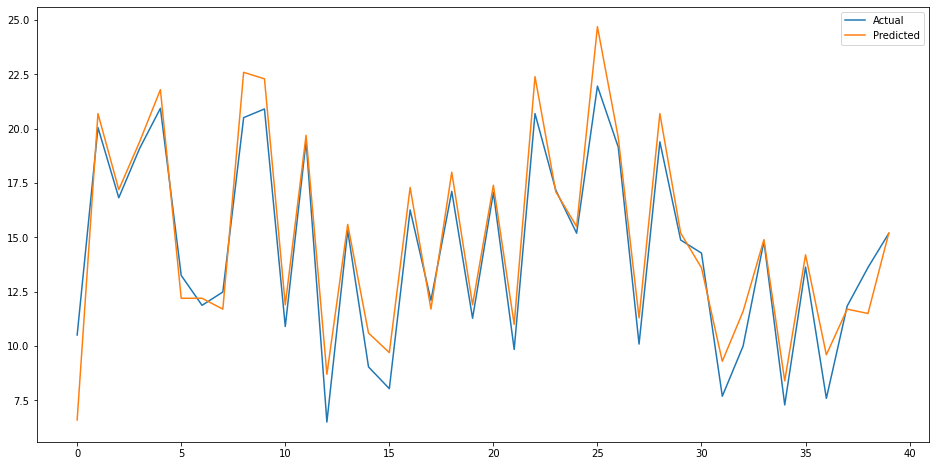

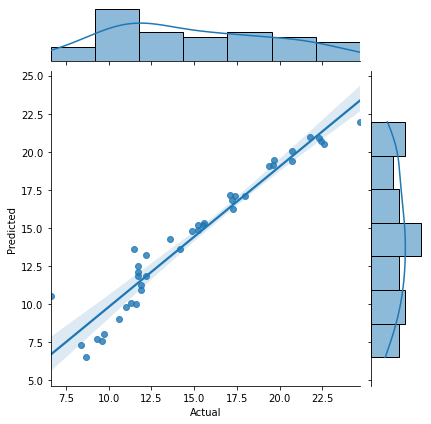

In [30]:
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);